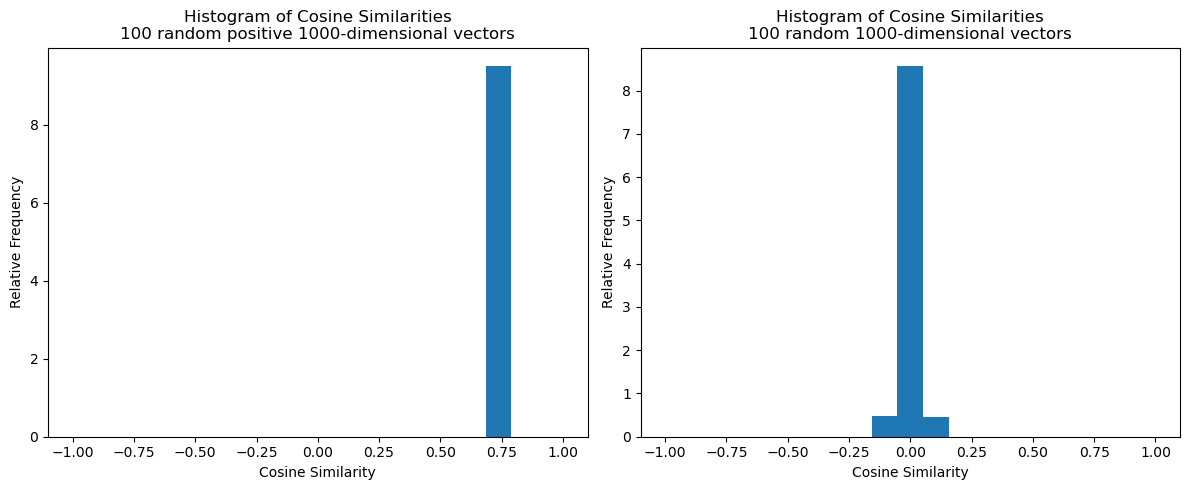

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

n = 100
dim = 1000

vecs_posneg = [np.random.random((n, dim)), np.random.random((n, dim)) * 2 - 1]

plt.figure(figsize=(12, 5))  # Adjust the figure size as needed

for i, vecs in enumerate(vecs_posneg):
    plt.subplot(1, 2, i+1)
    
    cos = cosine_similarity(vecs)
    cos_list = [c for c in np.tril(cos, k=-1).flatten() if c != 0]

    # Adjusting bin widths to ensure densities integrate to 1
    eps=1e-5
    plt.hist(cos_list, bins=np.linspace(-1-eps, 1+eps, 20), density=True)

    plt.xlabel('Cosine Similarity')
    plt.ylabel('Relative Frequency')
    plt.title(f'Histogram of Cosine Similarities\n{n} random {"positive " if i==0 else ""}{dim}-dimensional vectors')
    
plt.tight_layout()
plt.show()


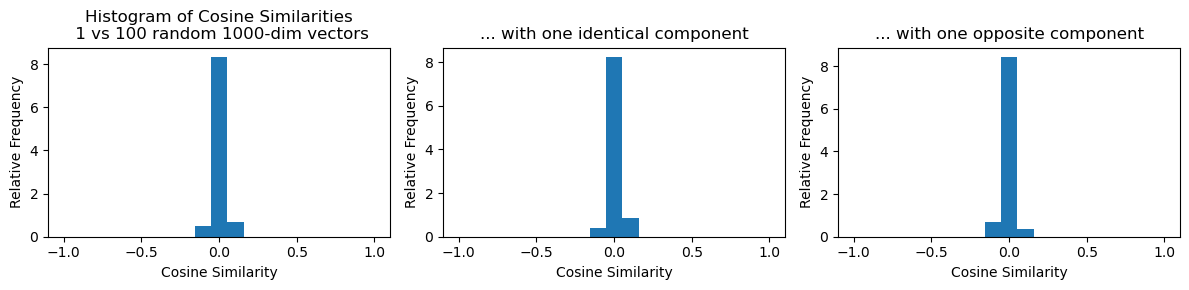

In [2]:
vecs = np.random.random((n, dim)) * 2 - 1

# Left
plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1)
cos = cosine_similarity(vecs[0:1], vecs[1:])
cos_list = cos[0]

# Adjusting bin widths to ensure densities integrate to 1
plt.hist(cos_list, bins=np.linspace(-1-eps, 1+eps, 20), density=True)
plt.xlabel('Cosine Similarity')
plt.ylabel('Relative Frequency')
plt.title(f'Histogram of Cosine Similarities\n 1 vs {n} random {dim}-dim vectors')

# Middle
vecs[:, 1] = 1
# vecs[0, 1] = -1
plt.subplot(1, 3, 2)
cos = cosine_similarity(vecs[0:1], vecs[1:])
cos_list = cos[0]

# Adjusting bin widths to ensure densities integrate to 1
plt.hist(cos_list, bins=np.linspace(-1-eps, 1+eps, 20), density=True)
plt.xlabel('Cosine Similarity')
plt.ylabel('Relative Frequency')
plt.title(f'... with one identical component')

# Right
vecs[:, 1] = 1
vecs[0, 1] = -1
plt.subplot(1, 3, 3)
cos = cosine_similarity(vecs[0:1], vecs[1:])
cos_list = cos[0]

# Adjusting bin widths to ensure densities integrate to 1
plt.hist(cos_list, bins=np.linspace(-1-eps, 1+eps, 20), density=True)
plt.xlabel('Cosine Similarity')
plt.ylabel('Relative Frequency')
plt.title(f'... with one opposite component')
plt.tight_layout()

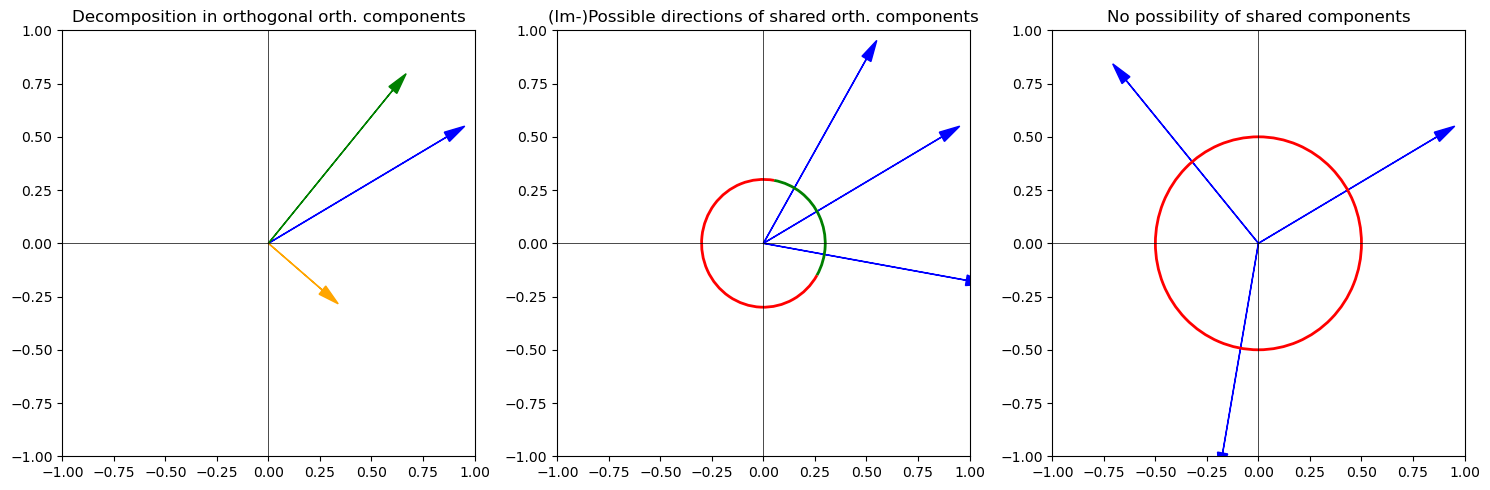

In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Function to rotate a vector by a given angle
def rotate_vector(x, y, angle):
    angle_rad = np.radians(angle)
    x_rotated = x * np.cos(angle_rad) - y * np.sin(angle_rad)
    y_rotated = x * np.sin(angle_rad) + y * np.cos(angle_rad)
    return x_rotated, y_rotated

def dotprod(x1,y1,x2,y2):
    return x1*x2+y1*y2

def decompose(x1,y1,x2,y2,x3,y3):
    """
    Projects the first vector onto the 2nd and 3rd vector. Returns both projections 
    """
    scale2 = dotprod(x1, y1, x2, y2)
    x2 *= scale2
    y2 *= scale2 

    scale3 = dotprod(x1, y1, x3, y3)
    x3 *= scale3
    y3 *= scale3

    return x2, y2, x3, y3

# Create figure and axis
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Left subplot
x1, y1 = rotate_vector(1, 0, 30)
x2, y2 = rotate_vector(1, 0, 50)
x3, y3 = rotate_vector(1, 0, -40)
x2, y2, x3, y3 = decompose(x1,y1,x2,y2,x3,y3)
axs[0].arrow(0, 0, x1, y1, head_width=0.05, head_length=0.1, fc='blue', ec='blue')
axs[0].arrow(0, 0, x2, y2, head_width=0.05, head_length=0.1, fc='green', ec='green')
axs[0].arrow(0, 0, x3, y3, head_width=0.05, head_length=0.1, fc='orange', ec='orange')
axs[0].set_xlim(-1, 1)
axs[0].set_ylim(-1, 1)
axs[0].axhline(0, color='black',linewidth=0.5)
axs[0].axvline(0, color='black',linewidth=0.5)
axs[0].set_title('Decomposition in orthogonal orth. components')
# axs[0].text(-0.8, -1.3, 'Example of a vector decomposing\n into 2 orthogonal directions.', fontsize=8)

# Middle subplot
x1, y1 = rotate_vector(1, 0, 30)
x2, y2 = rotate_vector(1, 0, 60)
x3, y3 = rotate_vector(1, 0, -10)
axs[1].arrow(0, 0, x1, y1, head_width=0.05, head_length=0.1, fc='blue', ec='blue')
axs[1].arrow(0, 0, x2, y2, head_width=0.05, head_length=0.1, fc='blue', ec='blue')
axs[1].arrow(0, 0, x3, y3, head_width=0.05, head_length=0.1, fc='blue', ec='blue')
# axs[1].arrow(0, 0, x2+90, y2, fc='gray', ec='gray')
# axs[1].arrow(0, 0, -x3, -y3, fc='gray', ec='gray')

# x_true, y_true = rotate_vector(1, 0, 10)
# axs[1].arrow(0, 0, x_true, y_true, head_width=0.05, head_length=0.1, fc='green', ec='green')


# # Add an arc to highlight the angle between the first and last vector
# Set start and end angles in degrees
start_angle = -120
end_angle = 170
# Draw an arc between 10 and 15 degrees around the origin
arc_radius = 1.0  # Set the radius of the arc
# arc = patches.Arc((0, 0), arc_radius, arc_radius, theta1=start_angle, theta2=end_angle, edgecolor='yellow', linewidth=2)
# axs[1].add_patch(arc)
arc = patches.Arc((0, 0), arc_radius*0.6, arc_radius*0.6, theta1=start_angle+90, theta2=end_angle-90, edgecolor='green', linewidth=2)
axs[1].add_patch(arc)
arc = patches.Arc((0, 0), arc_radius*0.6, arc_radius*0.6, theta1=end_angle-90, theta2=start_angle+90, edgecolor='red', linewidth=2)
axs[1].add_patch(arc)


axs[1].set_xlim(-1, 1)
axs[1].set_ylim(-1, 1)
axs[1].axhline(0, color='black',linewidth=0.5)
axs[1].axvline(0, color='black',linewidth=0.5)
axs[1].set_title('(Im-)Possible directions of shared orth. components')
# axs[1].text(-0.8, -1.3, '3 activations of true statements (green) and \n the area along which a general truth direction might lie (red)', fontsize=8)

# Right subplot
x1, y1 = rotate_vector(1, 0, 30)
x2, y2 = rotate_vector(1, 0, 130)
x3, y3 = rotate_vector(1, 0, 260)
axs[2].arrow(0, 0, x1, y1, head_width=0.05, head_length=0.1, fc='blue', ec='blue')
axs[2].arrow(0, 0, x2, y2, head_width=0.05, head_length=0.1, fc='blue', ec='blue')
axs[2].arrow(0, 0, x3, y3, head_width=0.05, head_length=0.1, fc='blue', ec='blue')

arc = patches.Arc((0, 0), arc_radius, arc_radius, theta1=0, theta2=360, edgecolor='red', linewidth=2)
axs[2].add_patch(arc)

axs[2].set_xlim(-1, 1)
axs[2].set_ylim(-1, 1)
axs[2].axhline(0, color='black',linewidth=0.5)
axs[2].axvline(0, color='black',linewidth=0.5)
axs[2].set_title('No possibility of shared components')

plt.tight_layout()
plt.show()


In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pathlib import Path
from elk_generalization.elk.elk_utils import SplitConfig

# Ignore pandas performancewarnings as these df's are small anyways
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

def cfg_sort_key(descriptor):
    cfg = SplitConfig.from_descriptor(descriptor)
    key1 = cfg.column_to_key["objective_labels"]
    key2 = cfg.column_to_key["quirky_labels"]
    alignment = cfg.get_alignment(key1=key1, key2=key2)

    return str(alignment) + descriptor

def alignment_str(descriptor):
    cfg = SplitConfig.from_descriptor(descriptor)
    key1 = cfg.column_to_key["objective_labels"]
    key2 = cfg.column_to_key["quirky_labels"]
    alignment = cfg.get_alignment(key1=key1, key2=key2)
    alignment_strings = {
        -1: "NEGATIVELY aligned",
        0: "NOT aligned",
        1: "POSITIVELY aligned"
    }
    return f"{key1}, {key2} are {alignment_strings[alignment]}"

def plot_heatmap_on_axis(df, axis, **heatmap_kwargs):
    # Sort index and columns by configs
    df = df.sort_index(level='train_cfg', key=lambda x: x.map(cfg_sort_key), ascending=False)
    sorted_columns = sorted(df.columns, key=cfg_sort_key, reverse=True)
    df = df[sorted_columns]

    # Compute delta=(AUROC_train2test - AUROC_train2train) loss of performance delta under distributional shift
    # Transposes are necessary to subtract the value from train->train transfer, rather test->test
    delta_df = (df.T - np.diag(df.T)).T
    # Convert numeric values to strings with "%.2f" format
    df_str = df.map(lambda x: "%.2f" % x)
    delta_df_str = delta_df.map(lambda x: "%.2f" % x)
    # Concatenate strings with the desired format
    result_df = df_str + '\n(' + delta_df_str + ')'

    # Plotting the DataFrame as a heatmap
    sns.heatmap(delta_df, annot=result_df, ax=axis, **heatmap_kwargs)

    ticks = range(len(result_df.index))
    axis.set_yticks(ticks)
    ticklabels = [desc + f"\n ({alignment_str(desc)})" for desc in result_df.index]
    # ticklabels = result_df.index
    axis.set_yticklabels(ticklabels, rotation=60, va="top", ha="right", fontsize="small")
    axis.set_ylabel('Train distribution')
    axis.set_xticklabels(ticklabels, rotation=60, va="top", ha="right", fontsize="small")
    axis.set_xlabel('Test distribution')
    return axis

def plot_heatmaps_all_models(df, reporter, models, **heatmap_kwargs):
    n_cols = 2
    n_rows = int(np.ceil(len(models) / n_cols))
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 24))
    fig.suptitle(f"AUROC_train2test (AUROC_train2test - AUROC_train2train)")
    for i, model in enumerate(models):
        col = i % n_cols
        row = int(i / n_cols)
        ax = axes[row][col]
        filtered_df = df.loc[model, reporter, :]

        plot_heatmap_on_axis(filtered_df, ax, **heatmap_kwargs)
        ax.set_title(f'{model=}, {reporter=}')

    fig.tight_layout()
    fig.subplots_adjust(top=0.95) # make sure there's enough space for the title

    return fig, axes

def plot_heatmaps_all_reporters(df, model, reporters, **heatmap_kwargs):
    n_cols = 2
    n_rows = int(np.ceil(len(reporters) / n_cols))
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 24))
    fig.suptitle(f"AUROC_train2test (AUROC_train2test - AUROC_train2train)")
    for i, reporter in enumerate(reporters):
        col = i % n_cols
        row = int(i / n_cols)
        ax = axes[row][col]
        filtered_df = df.loc[model, reporter, :]

        plot_heatmap_on_axis(filtered_df, ax, **heatmap_kwargs)
        ax.set_title(f'{model=}, {reporter=}')

    fig.tight_layout()
    fig.subplots_adjust(top=0.95) # make sure there's enough space for the title

    return fig, axes

In [42]:
# SAVE ALL PLOTS
# Options   
csv_dir = Path(r"..\elk-generalization\experiments")
csv_filename = Path("summary_aligning_20240331_deduplicated.csv")
fig_dir = Path(r"..\elk-generalization\figures\transfer_align") / csv_filename.stem
os.makedirs(fig_dir, exist_ok=True)
heatmap_kwargs = {"vmin": -0.5, "vmax": 0.5, "fmt":'', "cmap":'coolwarm', "cbar":False}
pr_filter_val = True

# Constants
models = ['pythia-12B', 'pythia-6.9B', 'pythia-2.8B', 'pythia-1.4B', 'pythia-1B', 'pythia-410M']
reporters = ["lr", "mean-diff", "lda", "ccs", "crc", "lm"]
unsupervised_reporters = ["ccs", "crc"]
supervised_reporters = ["lr", "mean-diff", "lda"]
reporters_with_averages = reporters + ["unsupervised_avg", "supervised_avg"]

# Prepare data
df = pd.read_csv(csv_dir / csv_filename, index_col=[0,1,2]) # Indexes are (model, reporter, train_cfg)
# df = df.sort_index()
# Filter
for f in ["pi=True", f"pr={pr_filter_val}"]:
    relevant_configs = df.index.get_level_values('train_cfg').str.contains(f)
    df = df.loc[relevant_configs, df.columns.str.contains(f)]
# Add averages
for model in models:
    for train_cfg in df.columns:
        for test_cfg in df.columns:
            unsupervised_performances = df.loc[pd.IndexSlice[model, unsupervised_reporters, train_cfg], test_cfg]
            supervised_performances = df.loc[pd.IndexSlice[model, supervised_reporters, train_cfg], test_cfg]
            assert len(unsupervised_performances) == len(unsupervised_reporters)
            assert len(supervised_performances) == len(supervised_reporters)
            
            df.loc[(model, "unsupervised_avg", train_cfg), test_cfg] = unsupervised_performances.mean()
            df.loc[(model, "supervised_avg", train_cfg), test_cfg] = supervised_performances.mean()


# Detailed plot showing only one model and reporter
for reporter in reporters_with_averages:
    for model in models:
        fig, ax = plt.subplots(figsize=(12,8))
        fig.suptitle("AUROC_train2test (AUROC_train2test - AUROC_train2train)")
        filtered_df = df.loc[model, reporter, :]
        plot_heatmap_on_axis(filtered_df, ax, **heatmap_kwargs)
        ax.set_title(f'{model=}, {reporter=}')
        fig.tight_layout()
        fig.savefig(fig_dir / f"pr={pr_filter_val}_{model}_{reporter}.png")
        plt.close(fig)

# Plots of all models
for reporter in reporters_with_averages:
    fig, axes = plot_heatmaps_all_models(df, reporter=reporter, models=models, **heatmap_kwargs)
    fig.savefig(fig_dir / f"all_models_pr={pr_filter_val}_{reporter}.png")
    plt.close(fig)

# Plots of all reporters
for model in models:
    fig, axes = plot_heatmaps_all_reporters(df, model=model, reporters=reporters_with_averages, **heatmap_kwargs)
    fig.savefig(fig_dir / f"all_reporters_pr={pr_filter_val}_{model}.png")
    plt.close(fig)

In [40]:
# Filter and save
df = pd.read_csv(csv_dir / csv_filename, index_col=[0,1,2]) # Indexes are (model, reporter, train_cfg)
df = df.drop(["label=ol-pa-na-filters_pi=True_pr=False", "label=ol-pa-na-filters_pi=True_pr=True"], axis=1)
df = df[~df.index.get_level_values("train_cfg").str.contains("ol-pa-na-")]

# df.to_csv(Path("summary_aligning_20240331_deduplicated.csv"))

6